# SCC-ICMC-USP - 1o. semestre de 2024

## SCC5871/MAI5025 - Exercício 4

## Profa. Roseli A. F. Romero


Nro do grupo: - 

Alunos:

1.   João Francisco Baiochi (n.ºUSP 7547674)
2.   

---  

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

### **Questão 1**

 - Separe o conjunto em treinamento (80%) e teste (20%)
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos
 - Dica: O Sklearn não trabalha com atributos nominais em árvores de decisão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names), 
                pd.DataFrame(data.target, columns=['target'])]
               , axis=1)
display(df.head())

# Split data
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Questão 2
Verificar se existem dados nulos.

In [2]:
print('Não há dados nulos no dataset.')
df.isna().sum()

Não há dados nulos no dataset.


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### **Questão 3**
Verifique se existem outliers e  quais atributos possuem outliers.
Crie um novo conjunto de dados, eliminando os outliers e considere esse novo conjunto para resolver os itens seguintes.

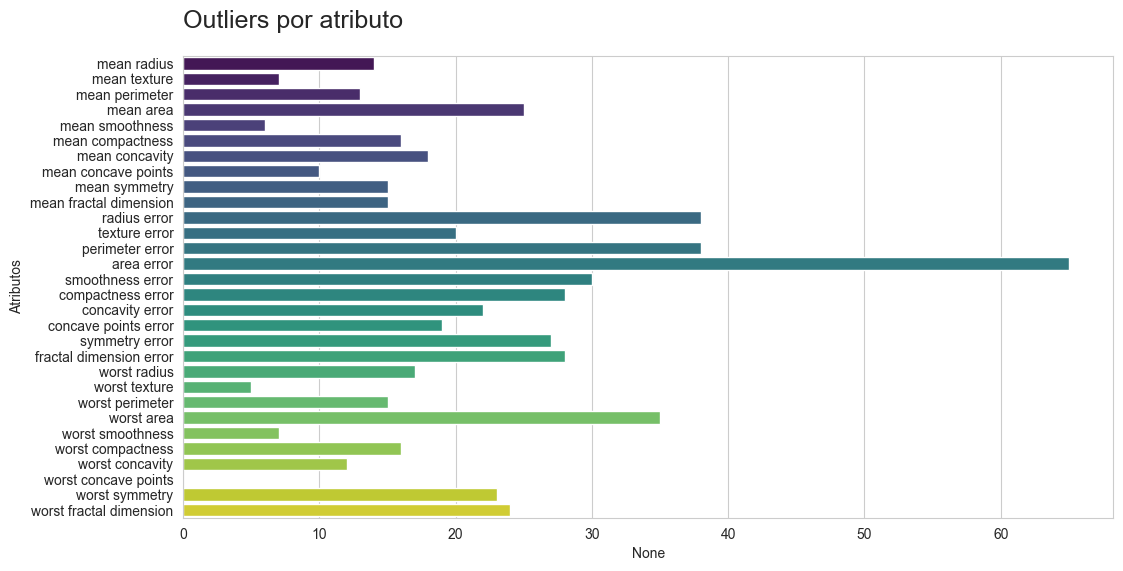

In [3]:
# Check outliers with z score
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

outliers = detect_outliers_iqr(df.drop(columns='target'))

# Outlier barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers.sum(), y=outliers.columns, 
            hue=outliers.columns, palette='viridis', legend=False)
plt.ylabel('Atributos')
plt.title('Outliers por atributo', loc='left', pad=20, size=18)
plt.show()

In [4]:
# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Split filtered dataset
X = df_no_outliers.drop(columns='target')
y = df_no_outliers['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transf = scaler.fit_transform(X_train)

# Define a dictionary to store metrics scores
metrics = {}

### **Questão 4**
Treine um modelo de regressão com o método DT, no conjunto de treino e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_transf, y_train)

# Predict
y_pred = clf.predict(scaler.transform(X_test))

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Store metrics
metrics['DT'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

Acurácia: 0.94
Precisão: 0.93
Recall: 0.98
F1-score: 0.96


### **Questão 5**
Treine um modelo de classificação com o **método RF**, no conjunto de treino 
 e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste. Determine usando o modelo RF os atributos mais relevantes.

Acurácia: 0.93
Precisão: 0.92
Recall: 0.98
F1-score: 0.95


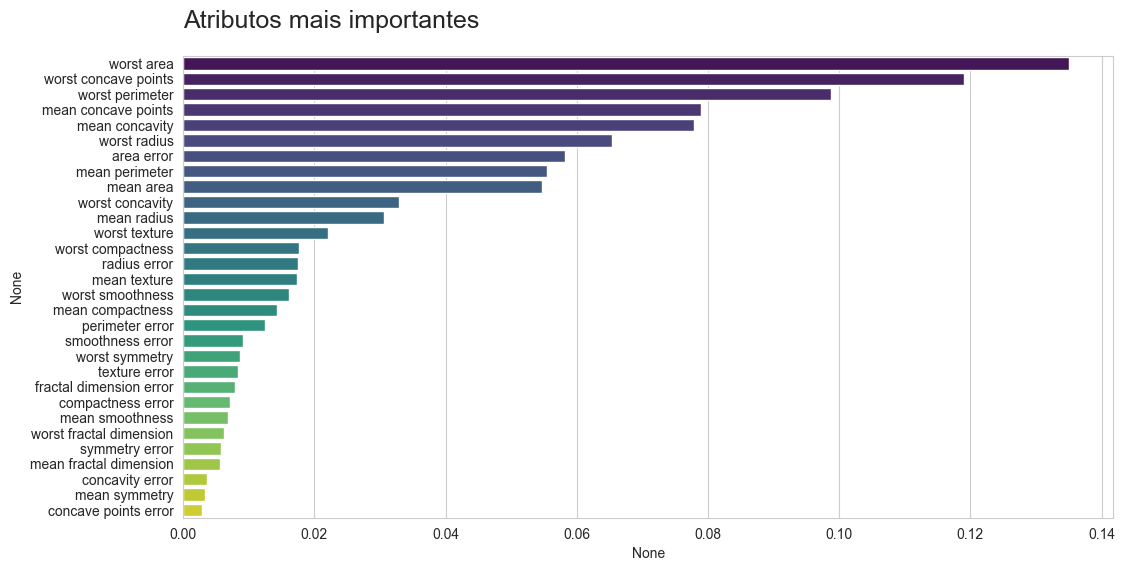

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_transf, y_train)

# Predict
y_pred = clf.predict(scaler.transform(X_test))

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Store metrics
metrics['RF'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, 
            hue=feature_importance.index, palette='viridis', legend=False)
plt.title('Atributos mais importantes', loc='left', pad=20, size=18)
plt.show()

### **Questão 6**

Treine um modelo de classificação com o método XGBoost, no conjunto de treino e calcule a acurácia, precisão, recall e o F1-score no conjunto de teste.

- Dica: Utilize `xgboost.XGBRegressor`

In [7]:
from xgboost import XGBClassifier

# Train model
clf = XGBClassifier(use_label_encoder=False, random_state=42)
clf.fit(X_train_transf, y_train)

# Predict
y_pred = clf.predict(scaler.transform(X_test))

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Store metrics
metrics['XGBoost'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

Acurácia: 0.93
Precisão: 0.95
Recall: 0.95
F1-score: 0.95


### **Questão 7**

Compare seus resultados com os modelos dos exercícios anteriores.

- Dica: Cuidado para usar o mesmo train/test split em todos os modelos para que a comparação faça sentido. Para isso você pode utilizar o mesmo `random_state` na função `train_test_split` nos dois métodos.




In [8]:
metrics_df = (pd.DataFrame(metrics)
              .rename_axis('Métrica')
              .reset_index()
              .melt(id_vars='Métrica', 
                    var_name='Modelo', 
                    value_name='Score')
              )
metrics_df

,Métrica,Modelo,Score
0,accuracy,DT,0.937500
1,precision,DT,0.931034
2,recall,DT,0.981818
3,f1,DT,0.955752
4,accuracy,RF,0.925000
5,precision,RF,0.915254
6,recall,RF,0.981818
7,f1,RF,0.947368
8,accuracy,XGBoost,0.925000
9,precision,XGBoost,0.945455


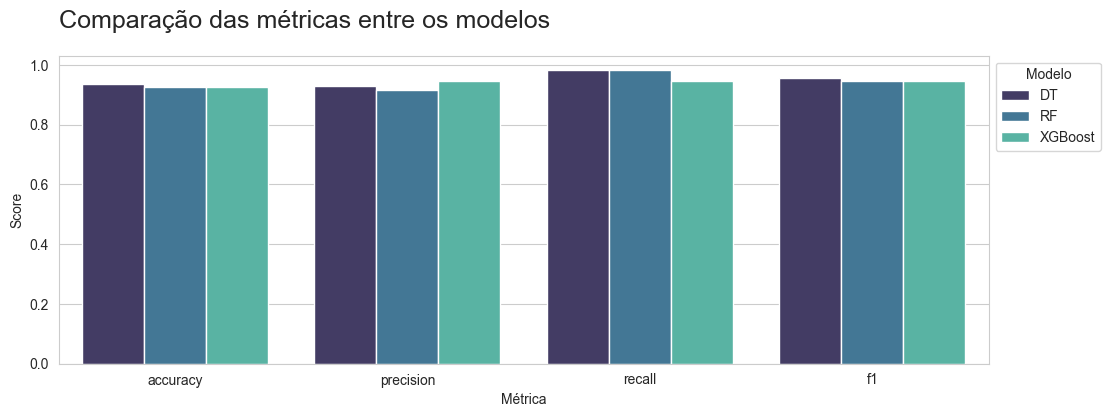

In [9]:
# Compare models
plt.figure(figsize=(12, 4))
sns.barplot(x='Métrica', y='Score', hue='Modelo', data=metrics_df, palette='mako')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Modelo')
plt.title('Comparação das métricas entre os modelos', loc='left', pad=20, size=18)
plt.show()


### **Questão 8**

Verifique a importância de cada feature para o resultado final utilizando o melhor modelo. O que isso diz sobre o problema que estamos tentando resolver?

Em problemas de classificação de doenças de alto risco, como o câncer de mama neste caso, o custo de um falso negativo (classificar um tumor maligno como benigno) é muito alto. Portanto, é importante que o modelo consiga identificar corretamente os tumores malignos, mesmo que isso signifique um aumento no número de falsos positivos.  
Por isso a melhor métrica indicada é o recall, e o modelo que obteve maior score neste quesito foi o `RandomForest`, com 1,0.

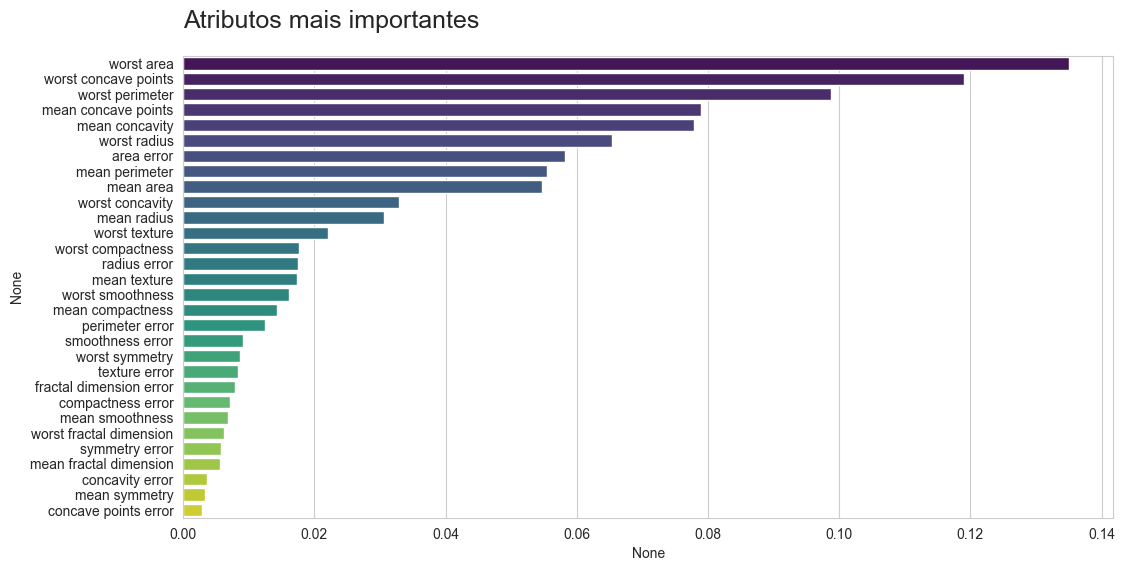

In [13]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_transf, y_train)
y_pred = clf.predict(scaler.transform(X_test))

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, 
            hue=feature_importance.index, palette='viridis', legend=False)
plt.title('Atributos mais importantes', loc='left', pad=20, size=18)
plt.show()

A partir do gráfico podemos identificar que atributos como 'worst area', 'worst concave points', 'worst radius', 'worst perimeter', 'mean concave points', e 'mean concavity' são os mais importantes para a classificação, indicando que tumores com essas características são mais propensos a serem malignos. Por outro lado, características como 'concavity error', 'mean fractal dimension', 'mean symmetry', e 'concave points error' são menos relevantes para a classificação.